# Import data wrangling and analytics library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Data read and Analysis

In [3]:
trainDf = pd.read_csv('train_indessa.csv')
testDf = pd.read_csv('test_indessa.csv')

In [4]:
trainDf.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [6]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

# Data Cleaning

In [7]:
trainDf.isna().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [8]:
testDf.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [10]:
# Drop the column that have more than 10%  missing values
trainDf = trainDf.dropna(how='any',axis=1,thresh=trainDf.shape[0]*0.90)
testDf = testDf.dropna(how='any',axis=1,thresh=testDf.shape[0]*0.90)

In [13]:
# Drop the missing rows
trainDf = trainDf.dropna(how='any',axis=0,)
testDf = testDf.dropna(how='any',axis=0,)

In [14]:
trainDf.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,credit_card,refi,900xx,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0


In [17]:
# drop high cardinality variable 
trainDf.drop(['emp_title', 'title', 'zip_code', 'addr_state'], axis=1, inplace=True) 
testDf.drop(['emp_title', 'title', 'zip_code', 'addr_state'], axis=1, inplace=True) 

In [18]:
# replace the anomaly data 
trainDf['term'] = trainDf.term.str.replace('months', '')
trainDf['last_week_pay'] = trainDf.last_week_pay.str.replace('th week', '')

testDf['term'] = testDf.term.str.replace('months', '')
testDf['last_week_pay'] = testDf.last_week_pay.str.replace('th week', '')
trainDf

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,19.19,E,E3,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,10.99,B,B4,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,7.26,A,A4,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,19.72,D,D5,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,10.64,B,B2,10+ years,RENT,52000.0,Verified,n,credit_card,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,12.49,B,B5,10+ years,MORTGAGE,75000.0,Source Verified,n,debt_consolidation,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,INDIVIDUAL,65,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,14.99,C,C5,10+ years,MORTGAGE,59000.0,Not Verified,n,debt_consolidation,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,INDIVIDUAL,70,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,20.80,E,E1,8 years,RENT,42504.0,Verified,n,debt_consolidation,27.27,0.0,1.0,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,16.29,D,D2,1 year,RENT,50000.0,Source Verified,n,credit_card,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,INDIVIDUAL,78,0.0,0.0,29197.0,23300.0,0


In [19]:
# Changed the datatype
trainDf.last_week_pay = pd.to_numeric(trainDf.last_week_pay, errors='coerce',)
testDf.last_week_pay = pd.to_numeric(testDf.last_week_pay, errors='coerce',)

In [20]:
# drop na values
trainDf.dropna(axis=0, inplace=True)
testDf.dropna(axis=0, inplace=True)

In [21]:
# set index as member_id
trainDf.set_index('member_id', inplace= True)
testDf.set_index('member_id', inplace= True)

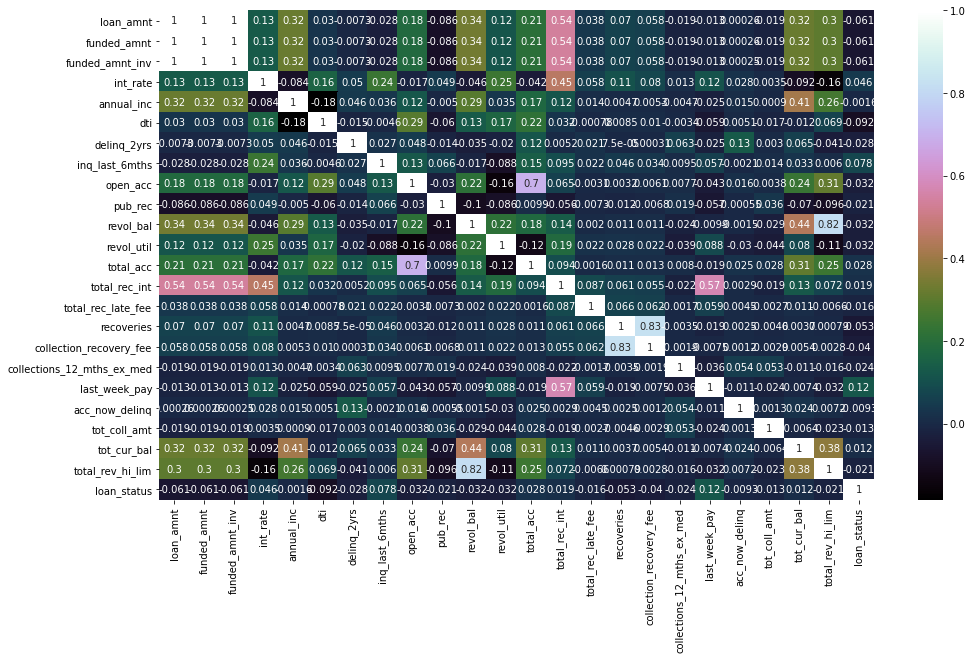

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(trainDf.corr(), annot=True, cmap="cubehelix")
plt.show()

In [23]:
trainDf.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
loan_amnt,1.000000,1.000000,0.999994,0.131339,0.322175,0.030450,-0.007266,-0.028092,0.182787,-0.086237,0.335906,0.118623,0.210276,0.539418,0.037969,0.070259,0.058198,-0.018551,-0.012987,0.000264,-0.019002,0.322342,0.304510,-0.061243
funded_amnt,1.000000,1.000000,0.999995,0.131340,0.322173,0.030449,-0.007266,-0.028093,0.182786,-0.086237,0.335905,0.118625,0.210275,0.539418,0.037969,0.070259,0.058198,-0.018551,-0.012989,0.000264,-0.019001,0.322342,0.304508,-0.061243
funded_amnt_inv,0.999994,0.999995,1.000000,0.131245,0.322220,0.030371,-0.007265,-0.028078,0.182804,-0.086223,0.335896,0.118551,0.210297,0.539414,0.037962,0.070244,0.058189,-0.018568,-0.013076,0.000252,-0.019003,0.322366,0.304540,-0.061318
int_rate,0.131339,0.131340,0.131245,1.000000,-0.083672,0.160802,0.050280,0.244077,-0.017054,0.049363,-0.046047,0.248887,-0.041939,0.454702,0.057858,0.109047,0.080005,0.012897,0.116143,0.027684,0.003539,-0.091752,-0.160902,0.045535
annual_inc,0.322175,0.322173,0.322220,-0.083672,1.000000,-0.184093,0.046025,0.035691,0.123625,-0.005010,0.293354,0.035186,0.173838,0.117936,0.013845,0.004722,0.005277,-0.004684,-0.025264,0.014609,0.000902,0.412876,0.263672,-0.001591
dti,0.030450,0.030449,0.030371,0.160802,-0.184093,1.000000,-0.014789,-0.004625,0.293084,-0.059620,0.133134,0.168279,0.219495,0.032176,-0.000785,0.008513,0.009972,-0.003449,-0.058839,0.005102,-0.017118,-0.012010,0.069109,-0.091850
delinq_2yrs,-0.007266,-0.007266,-0.007265,0.050280,0.046025,-0.014789,1.000000,0.027153,0.047929,-0.013893,-0.035153,-0.020298,0.120817,0.005248,0.021060,0.000075,0.000312,0.062920,-0.025424,0.133952,0.003035,0.064546,-0.040673,-0.027892
inq_last_6mths,-0.028092,-0.028093,-0.028078,0.244077,0.035691,-0.004625,0.027153,1.000000,0.126329,0.066100,-0.017155,-0.087570,0.148164,0.094785,0.021535,0.046351,0.033529,0.009529,0.056689,-0.002091,0.013884,0.033244,0.005954,0.078316
open_acc,0.182787,0.182786,0.182804,-0.017054,0.123625,0.293084,0.047929,0.126329,1.000000,-0.029996,0.216868,-0.156042,0.695696,0.065340,-0.003077,0.003233,0.006073,0.007690,-0.043396,0.015897,0.003787,0.240800,0.312621,-0.031805
pub_rec,-0.086237,-0.086237,-0.086223,0.049363,-0.005010,-0.059620,-0.013893,0.066100,-0.029996,1.000000,-0.104019,-0.086203,0.009908,-0.055579,-0.007308,-0.011702,-0.006750,0.019322,-0.056955,-0.000551,0.035543,-0.070424,-0.095719,-0.020995


In [24]:
# drop the Highly correlated variable  
trainDf.drop(['funded_amnt', 'funded_amnt_inv', 'sub_grade' ], axis=1, inplace=True) #'df_index'
testDf.drop(['funded_amnt', 'funded_amnt_inv', 'sub_grade'], axis=1, inplace=True) # 'df_index'

# Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='loan_status'>

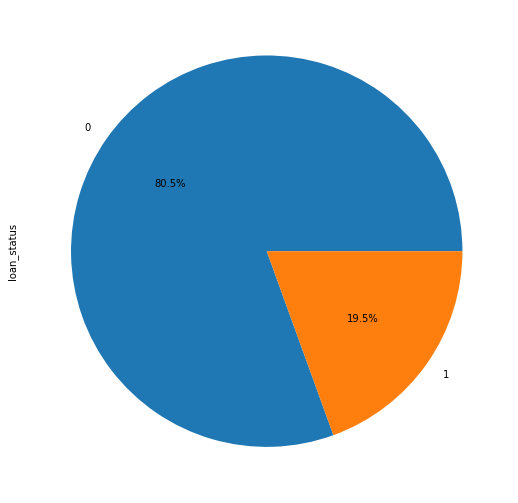

In [61]:
(trainDf.groupby('loan_status')['loan_status'].count()).plot.pie(autopct='%1.1f%%',figsize=(16,9))

grade


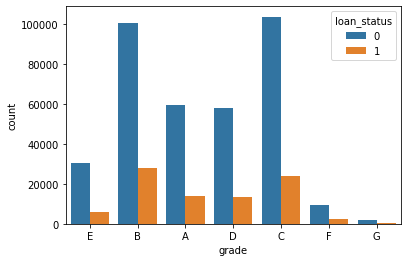

emp_length


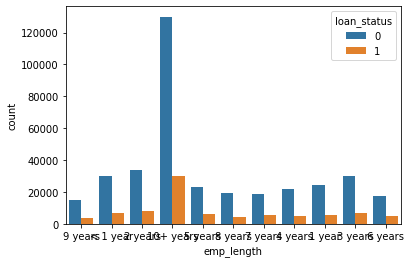

home_ownership


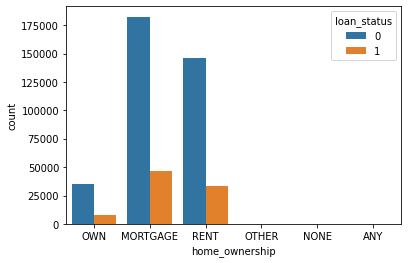

verification_status


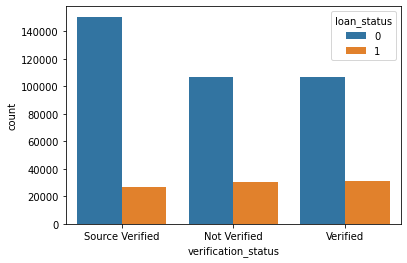

pymnt_plan


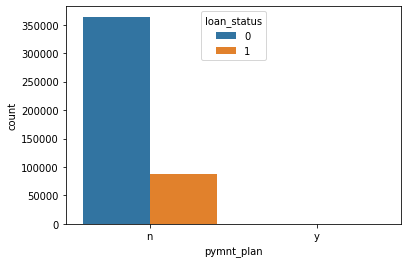

purpose


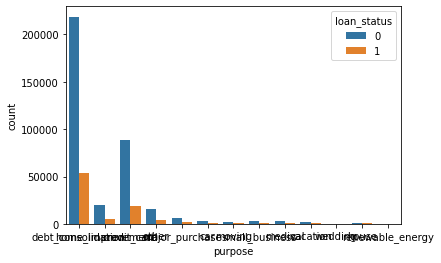

initial_list_status


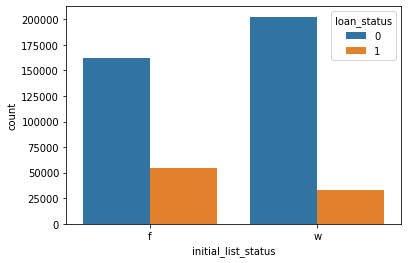

application_type


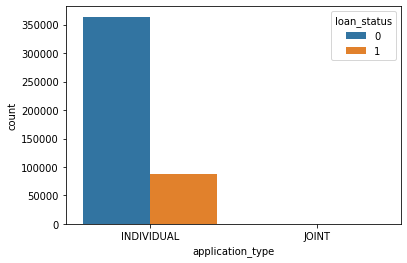

In [26]:
eda_col = ['grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'application_type']

for col in eda_col:
    print(col)
    sns.countplot(col,hue='loan_status',data=trainDf,)
    plt.show()

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>],
       [<AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'total_rec_int'}>,
        <AxesSubplot:title={'center':'total_rec_late_fee'}>,
        <AxesSubplot:title={'center':'recoveries'}>,
        <AxesSubplot:title={'center':'collection_recovery_fee'}>],
       [<AxesSubplot:title={'center':'collections_12_mths_ex_med'}>,
        <AxesSubplot:title={'center':'last_week_pay'}>,
        <AxesSubplot:title={'center':'acc_now_delinq'}>,
        

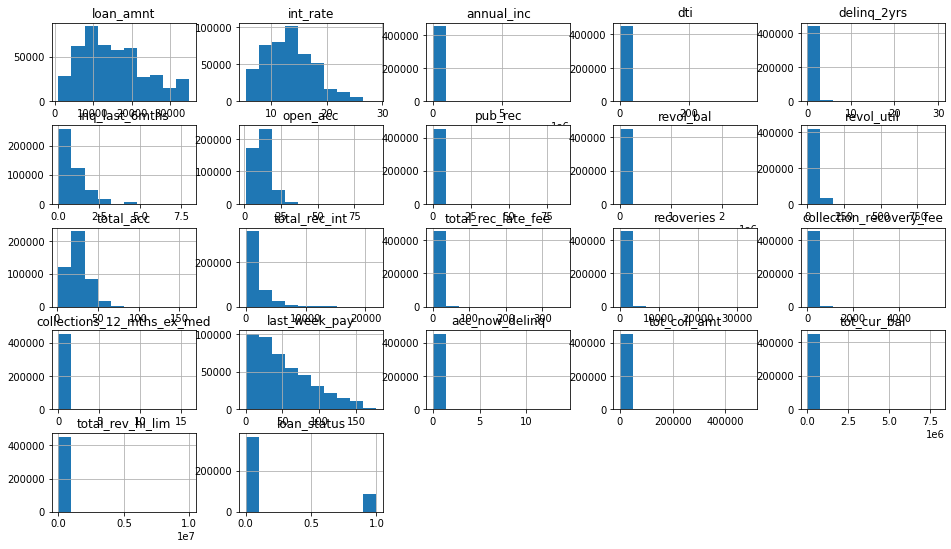

In [27]:
trainDf.hist(figsize=(16,9))

# Data type transformation

In [28]:
trainDf.head(10)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58189336,14350,36,19.19,E,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26.0,0.0,0.0,28699.0,30800.0,0
70011223,4800,36,10.99,B,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,0.0,9974.0,32900.0,0
70255675,10000,36,7.26,A,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,65.0,38295.0,34900.0,0
1893936,15000,36,19.72,D,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135.0,0.0,0.0,55564.0,24700.0,0
7652106,16000,36,10.64,B,10+ years,RENT,52000.0,Verified,n,credit_card,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96.0,0.0,0.0,47159.0,47033.0,0
10247268,15000,36,8.90,A,2 years,MORTGAGE,120000.0,Not Verified,n,debt_consolidation,12.30,0.0,0.0,18.0,0.0,19040.0,64.5,30.0,f,1957.24,0.0,0.0,0.0,0.0,INDIVIDUAL,113.0,0.0,0.0,350619.0,29500.0,0
8089625,5000,36,7.90,A,5 years,RENT,75000.0,Source Verified,n,debt_consolidation,5.70,0.0,0.0,13.0,2.0,13272.0,23.9,23.0,f,578.36,0.0,0.0,0.0,0.0,INDIVIDUAL,117.0,0.0,1023.0,13272.0,55500.0,1
23043116,6000,36,9.17,B,8 years,MORTGAGE,54000.0,Not Verified,n,credit_card,11.63,0.0,1.0,13.0,0.0,3484.0,29.5,49.0,f,637.51,0.0,0.0,0.0,0.0,INDIVIDUAL,78.0,0.0,0.0,272579.0,11800.0,0
45900933,6000,36,13.99,C,7 years,MORTGAGE,92000.0,Not Verified,n,home_improvement,30.85,0.0,0.0,16.0,0.0,47567.0,76.6,27.0,w,621.72,0.0,0.0,0.0,0.0,INDIVIDUAL,44.0,0.0,0.0,281521.0,62100.0,0


In [29]:
testDf.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11937648,14000,60,16.24,C,4 years,RENT,73500.0,Source Verified,n,credit_card,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,INDIVIDUAL,104.0,0.0,0.0,85230.0,45700.0
38983318,16000,60,9.49,B,5 years,MORTGAGE,105000.0,Source Verified,n,major_purchase,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,INDIVIDUAL,57.0,0.0,0.0,444991.0,21400.0
27999917,11050,60,15.61,D,10+ years,RENT,62300.0,Not Verified,n,debt_consolidation,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,INDIVIDUAL,70.0,0.0,0.0,105737.0,16300.0
61514932,35000,60,12.69,C,10+ years,OWN,150000.0,Source Verified,n,debt_consolidation,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,INDIVIDUAL,22.0,0.0,0.0,287022.0,72400.0
59622821,6500,36,6.89,A,5 years,MORTGAGE,52000.0,Not Verified,n,major_purchase,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,INDIVIDUAL,22.0,0.0,0.0,234278.0,26700.0


In [30]:
le = LabelEncoder()
# dtype transform of train dataset
trainDf.grade = le.fit_transform(trainDf.grade)
trainDf.emp_length = le.fit_transform(trainDf.emp_length)
trainDf.verification_status = le.fit_transform(trainDf.verification_status)
trainDf.pymnt_plan = le.fit_transform(trainDf.pymnt_plan)
trainDf.purpose = le.fit_transform(trainDf.purpose)
trainDf.initial_list_status = le.fit_transform(trainDf.initial_list_status)
trainDf.application_type = le.fit_transform(trainDf.application_type)
trainDf.home_ownership = le.fit_transform(trainDf.home_ownership)

# dtype transform of test dataset
testDf.grade = le.fit_transform(testDf.grade)
testDf.emp_length = le.fit_transform(testDf.emp_length)
testDf.verification_status = le.fit_transform(testDf.verification_status)
testDf.pymnt_plan = le.fit_transform(testDf.pymnt_plan)
testDf.purpose = le.fit_transform(testDf.purpose)
testDf.initial_list_status = le.fit_transform(testDf.initial_list_status)
testDf.application_type = le.fit_transform(testDf.application_type)
testDf.home_ownership = le.fit_transform(testDf.home_ownership)

In [31]:
trainDf.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58189336,14350,36,19.19,4,9,4,28700.0,1,0,2,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,0,26.0,0.0,0.0,28699.0,30800.0,0
70011223,4800,36,10.99,1,10,1,65000.0,1,0,3,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,0,9.0,0.0,0.0,9974.0,32900.0,0
70255675,10000,36,7.26,0,2,4,45000.0,0,0,2,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,0,9.0,0.0,65.0,38295.0,34900.0,0
1893936,15000,36,19.72,3,1,5,105000.0,0,0,2,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,0,135.0,0.0,0.0,55564.0,24700.0,0
7652106,16000,36,10.64,1,1,5,52000.0,2,0,1,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,0,96.0,0.0,0.0,47159.0,47033.0,0


In [32]:
trainDf.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                           int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
pymnt_plan                      int32
purpose                         int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
collections_12_mths_ex_med    float64
application_type                int32
last_week_pay                 float64
acc_now_deli

In [33]:
trainDf.drop_duplicates(inplace=True)

# Feature Ranking

In [34]:
# Extract the input variable and target variable
X = trainDf.drop('loan_status', axis=1)

Y = trainDf[['loan_status']]

# Store the column/feature names into a list "colnames"
colnames = list(trainDf.drop('loan_status', axis=1))

In [35]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [36]:
# Construct Recursive Feature Elimination ( RFE ) of the Logistic Regression model
lr = LogisticRegression(random_state= 42)  #lr = LinearRegression(normalize=True)
lr.fit(X,Y)

#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, ) #verbose =3
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [37]:
# Using Logistic Regression
lr = LogisticRegression()
lr.fit(X,Y)

#ranks["LogReg"] = ranking(np.abs(lr.coef_), colnames)

LogisticRegression()

In [38]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X,Y)
ranks["DT"] = ranking(dt.feature_importances_, colnames)

In [39]:
# Random Forest Classifier

rf = RandomForestClassifier(n_jobs=-1, n_estimators=9, ) #verbose=3
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

# Creating the Feature Ranking Matrix
We combine the scores from the various methods above and output it in a matrix form for convenient viewing as such:

In [40]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, [ranks[method][name] for method in methods]))))

	DT	RF	RFE	Mean
loan_amnt	0.15	0.52	0.28	0.32
term	0.1	0.13	0.69	0.31
int_rate	1.0	0.92	0.86	0.93
grade	0.18	0.25	0.9	0.44
emp_length	0.1	0.31	0.41	0.27
home_ownership	0.03	0.11	0.72	0.29
annual_inc	0.2	0.54	0.03	0.26
verification_status	0.05	0.15	0.45	0.22
pymnt_plan	0.0	0.0	0.0	0.0
purpose	0.06	0.19	0.62	0.29
dti	0.28	0.69	0.66	0.54
delinq_2yrs	0.04	0.1	0.52	0.22
inq_last_6mths	0.06	0.17	0.83	0.35
open_acc	0.14	0.41	0.59	0.38
pub_rec	0.03	0.08	0.76	0.29
revol_bal	0.19	0.59	0.21	0.33
revol_util	0.22	0.62	0.24	0.36
total_acc	0.18	0.51	0.55	0.41
initial_list_status	0.07	0.15	1.0	0.41
total_rec_int	0.24	0.71	0.31	0.42
total_rec_late_fee	0.02	0.02	0.48	0.17
recoveries	0.06	0.03	0.97	0.35
collection_recovery_fee	0.01	0.03	0.79	0.28
collections_12_mths_ex_med	0.0	0.01	0.93	0.31
application_type	0.0	0.0	0.07	0.02
last_week_pay	0.86	1.0	0.38	0.75
acc_now_delinq	0.0	0.01	0.14	0.05
tot_coll_amt	0.04	0.12	0.34	0.17
tot_cur_bal	0.23	0.61	0.1	0.31
total_rev_hi_lim	0.18	0.57	0.17	0.31


In [41]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

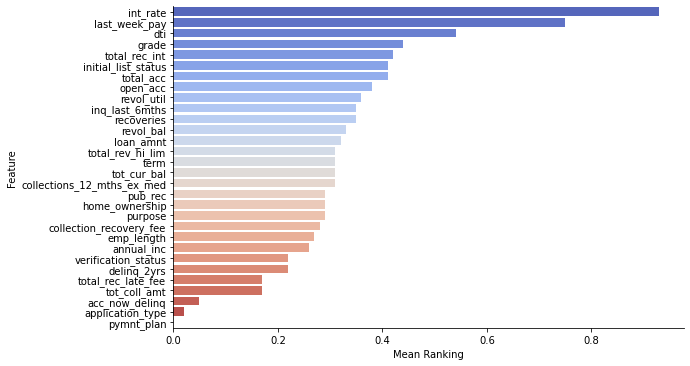

In [42]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=5, aspect=1.9, palette='coolwarm', )

In [43]:
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
meanplot

,Feature,Mean Ranking
2,int_rate,0.93
25,last_week_pay,0.75
10,dti,0.54
3,grade,0.44
19,total_rec_int,0.42
18,initial_list_status,0.41
17,total_acc,0.41
13,open_acc,0.38
16,revol_util,0.36
12,inq_last_6mths,0.35


In [44]:
columnName = meanplot.loc[meanplot['Mean Ranking']  >= 0.40]
columnName = list(columnName.Feature)
columnName

['int_rate',
 'last_week_pay',
 'dti',
 'grade',
 'total_rec_int',
 'initial_list_status',
 'total_acc']

# Predictive Modeling

In [45]:
# Extract the input variable and target variable
X = trainDf[columnName]
y = trainDf[['loan_status']]

testDf = testDf[columnName]


In [46]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))


X_train 316397
X_test 135599
y_train 316397
y_test 135599


In [48]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state)]

dt_param_grid = {"min_samples_split" : range(10,20),
                "max_depth": range(1,2)}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[9,11],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

classifier_param = [dt_param_grid,
                   rf_param_grid,
                   logreg_param_grid,]


In [62]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 5), scoring = "roc_auc", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.5258917778783452
Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.8495953254326531
Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.6386750508763893


Text(0.5, 1.0, 'Cross Validation Scores')

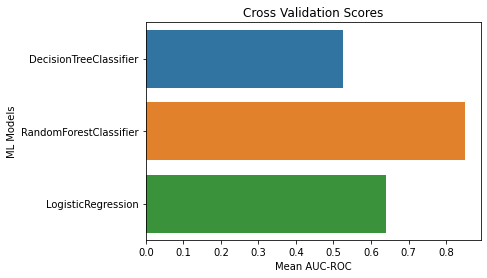

In [63]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "RandomForestClassifier",
             "LogisticRegression", ]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean AUC-ROC")
g.set_title("Cross Validation Scores")

# Ensemble Modeling

In [72]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[2])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(round(roc_auc_score(votingC.predict(X_test),y_test),4))

0.8439


# Prediction

In [66]:
test_loan_status = pd.Series(votingC.predict(testDf), name = "loan_status").astype(int)
test_loan_status

0         0
1         0
2         0
3         0
4         0
         ..
300982    0
300983    0
300984    0
300985    0
300986    0
Name: loan_status, Length: 300987, dtype: int32

In [78]:
member_id = pd.Series(testDf.index)
member_id

0         11937648
1         38983318
2         27999917
3         61514932
4         59622821
            ...   
300982    70721678
300983    70348484
300984    19145105
300985    46304777
300986    53032475
Name: member_id, Length: 300987, dtype: int64

In [83]:
results = pd.concat([member_id, test_loan_status],axis = 1)
results

,member_id,loan_status
0,11937648,0
1,38983318,0
2,27999917,0
3,61514932,0
4,59622821,0
...,...,...
300982,70721678,0
300983,70348484,0
300984,19145105,0
300985,46304777,0


In [85]:
# export into csv format
results.to_csv("LoanDefaulterPrediction.csv", index = False)